In [1]:
import os
import tensorflow as tf
import time
import datetime
import numpy as np
from mlp.data_providers import MNISTDataProvider, AugmentedCIFAR10DataProvider, AugmentedCIFAR100DataProvider, CIFAR100DataProvider, CIFAR10DataProvider
from mlp.tf_layers import FCLayer, ConvLayer, max_pool_2x2
from mlp.image_transforms import random_flip, random_crop, center_crop, random_flip_small
from mlp.GAN_models import GAN, WasserstienGAN
import matplotlib.pyplot as plt
import seaborn as sns
import cPickle
%matplotlib inline

# Seed a random number generator
seed = 24102016 
rng = np.random.RandomState(seed)

In [2]:
model_name = 'WGAN'
timestamp = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

In [3]:
batch_size = 64  # batch size for training
z_dim = 100  # size of input vector to generator
learning_rate = 5e-5  # Learning rate for Adam Optimizer
optimizer_param = 0.9  # beta1 for Adam optimizer / decay for RMSProp
iterations = 1e5  # No. of iterations to train model
image_size = 32  # Size of actual images, Size of images to be generated at.
model = 1  # Model to train. 0 - GAN, 1 - WassersteinGAN
optimizer = "RMSProp"  # Optimizer to use for training
gen_dim = 16  # dimension of first layer in generator
mode = "train"  # train / visualize model
logs_dir = '/home/ben/Dissertation/Multitask-Learning-With-GANs/3_wgan'

In [4]:
train_data = CIFAR100DataProvider(which_set='train', batch_size=batch_size)
#train_data = CIFAR100DataProvider(which_set='train', batch_size=batch_size)
#train_data.inputs = center_crop(train_data.inputs, rng)

In [5]:
generator_dims = [128 * gen_dim, 64 * gen_dim // 2, 64 * gen_dim // 4, 3]
discriminator_dims = [3, 64, 64 * 2, 64 * 4, 64 * 8, 1]

if model == 0:
    model = GAN(z_dim, batch_size, train_data, image_size)
elif model == 1:
    model = WasserstienGAN(z_dim, batch_size, train_data, image_size, clip_values=(-0.01, 0.01), critic_iterations=5,
                          penalise_gradient_norm=True, lmbda=10)
else:
    raise ValueError("Unknown model identifier - model=%d" % model)

model.create_network(generator_dims, discriminator_dims, optimizer, learning_rate, optimizer_param)
model.initialize_network(logs_dir)

if mode == "train":
    model.train_model(int(1 + iterations))
elif mode == "visualize":
    model.visualize_model()

Setting up model...
Initializing network...
Training Wasserstein GAN model...
Time: 0.610678/itr, Step: 200, generator loss: -5.76195, discriminator_loss: -2.00495
Time: 0.441096/itr, Step: 400, generator loss: -4.33621, discriminator_loss: -3.01324
Time: 0.448594/itr, Step: 600, generator loss: 10.3539, discriminator_loss: -0.928664
Time: 0.44079/itr, Step: 800, generator loss: -4.8178, discriminator_loss: -1.72011
Time: 0.448382/itr, Step: 1000, generator loss: 10.344, discriminator_loss: -1.58933
Time: 0.440867/itr, Step: 1200, generator loss: -4.4245, discriminator_loss: -1.35773
Time: 0.441788/itr, Step: 1400, generator loss: 1.37904, discriminator_loss: -1.265
Time: 0.448899/itr, Step: 1600, generator loss: 1.00992, discriminator_loss: -1.33865
Time: 0.442283/itr, Step: 1800, generator loss: -9.33046, discriminator_loss: -0.909488
Time: 0.449942/itr, Step: 2000, generator loss: 1.65993, discriminator_loss: -0.296714
Time: 0.443784/itr, Step: 2200, generator loss: 2.14725, discrim

Time: 0.462069/itr, Step: 18800, generator loss: 0.223885, discriminator_loss: -0.331325
Time: 0.465881/itr, Step: 19000, generator loss: -2.12541, discriminator_loss: -0.267121
Time: 0.462887/itr, Step: 19200, generator loss: 0.93238, discriminator_loss: -0.393636
Time: 0.461923/itr, Step: 19400, generator loss: -1.41863, discriminator_loss: -0.617282
Time: 0.467746/itr, Step: 19600, generator loss: 0.0191323, discriminator_loss: -0.259266
Time: 0.460451/itr, Step: 19800, generator loss: 0.830699, discriminator_loss: -0.54277
Time: 0.46883/itr, Step: 20000, generator loss: -1.84342, discriminator_loss: -0.0525653
Time: 0.44078/itr, Step: 20200, generator loss: -0.735703, discriminator_loss: -0.276687
Time: 0.443573/itr, Step: 20400, generator loss: -0.42424, discriminator_loss: -0.726124
Time: 0.450595/itr, Step: 20600, generator loss: 0.989161, discriminator_loss: -0.47853
Time: 0.442832/itr, Step: 20800, generator loss: 0.44044, discriminator_loss: -0.605636
Time: 0.449566/itr, Step

Time: 0.511048/itr, Step: 37200, generator loss: 0.96968, discriminator_loss: -0.522438
Time: 0.785815/itr, Step: 37400, generator loss: -0.657979, discriminator_loss: -0.540027
Time: 0.644106/itr, Step: 37600, generator loss: 0.998378, discriminator_loss: -0.661527
Time: 0.505739/itr, Step: 37800, generator loss: 1.50974, discriminator_loss: -0.830189
Time: 0.469669/itr, Step: 38000, generator loss: -1.38262, discriminator_loss: 0.0439951
Time: 0.834635/itr, Step: 38200, generator loss: -1.38073, discriminator_loss: -0.773842
Time: 0.510421/itr, Step: 38400, generator loss: 0.941693, discriminator_loss: -0.716876
Time: 0.514/itr, Step: 38600, generator loss: 0.20326, discriminator_loss: -0.621758
Time: 0.965313/itr, Step: 38800, generator loss: -0.270003, discriminator_loss: -0.531494
Time: 0.513321/itr, Step: 39000, generator loss: 2.58707, discriminator_loss: -0.41505
Time: 0.985111/itr, Step: 39200, generator loss: -1.36085, discriminator_loss: -0.746354
Time: 0.761255/itr, Step: 3

Time: 0.559535/itr, Step: 55800, generator loss: -1.5134, discriminator_loss: -0.733703
Time: 0.548207/itr, Step: 56000, generator loss: -0.481506, discriminator_loss: -0.548684
Time: 0.445689/itr, Step: 56200, generator loss: 0.017145, discriminator_loss: -0.845223
Time: 0.442068/itr, Step: 56400, generator loss: -0.571614, discriminator_loss: -0.874285
Time: 0.764017/itr, Step: 56600, generator loss: -0.319063, discriminator_loss: -0.97771
Time: 0.444773/itr, Step: 56800, generator loss: -2.23634, discriminator_loss: -0.26329
Time: 0.451616/itr, Step: 57000, generator loss: 1.04609, discriminator_loss: -1.06515
Time: 0.451315/itr, Step: 57200, generator loss: -0.143774, discriminator_loss: -0.668359
Time: 0.687825/itr, Step: 57400, generator loss: 0.0355632, discriminator_loss: -0.483537
Time: 0.451349/itr, Step: 57600, generator loss: -0.810162, discriminator_loss: -0.548381
Time: 0.44365/itr, Step: 57800, generator loss: -1.16623, discriminator_loss: -0.940394
Time: 0.451818/itr, S

Time: 0.458377/itr, Step: 74200, generator loss: -0.0850969, discriminator_loss: -0.788465
Time: 0.462356/itr, Step: 74400, generator loss: 0.0811731, discriminator_loss: -0.529366
Time: 0.465484/itr, Step: 74600, generator loss: 0.0629929, discriminator_loss: -0.596784
Time: 0.506932/itr, Step: 74800, generator loss: -0.948166, discriminator_loss: -0.751758
Time: 0.460702/itr, Step: 75000, generator loss: -0.388413, discriminator_loss: -0.725623
Time: 0.476983/itr, Step: 75200, generator loss: 0.0391948, discriminator_loss: -0.944248
Time: 0.450749/itr, Step: 75400, generator loss: -0.115359, discriminator_loss: -0.98887
Time: 0.465834/itr, Step: 75600, generator loss: -1.27923, discriminator_loss: -0.880612
Time: 0.504639/itr, Step: 75800, generator loss: -0.851401, discriminator_loss: -0.68928
Time: 0.473015/itr, Step: 76000, generator loss: -0.828145, discriminator_loss: -1.03587
Time: 0.460419/itr, Step: 76200, generator loss: 0.369536, discriminator_loss: -0.686701
Time: 0.499663

Time: 0.527617/itr, Step: 92600, generator loss: -2.35899, discriminator_loss: -0.771439
Time: 0.429077/itr, Step: 92800, generator loss: 0.302498, discriminator_loss: -0.768565
Time: 0.44703/itr, Step: 93000, generator loss: 1.167, discriminator_loss: -0.902022
Time: 0.443732/itr, Step: 93200, generator loss: 0.885956, discriminator_loss: -1.05457
Time: 0.525646/itr, Step: 93400, generator loss: -0.747989, discriminator_loss: -0.8859
Time: 0.452496/itr, Step: 93600, generator loss: -1.32575, discriminator_loss: -1.06169
Time: 0.444737/itr, Step: 93800, generator loss: -1.22028, discriminator_loss: -0.915229
Time: 0.603812/itr, Step: 94000, generator loss: -1.73824, discriminator_loss: -0.684349
Time: 0.4479/itr, Step: 94200, generator loss: -0.492625, discriminator_loss: -1.20511
Time: 0.447224/itr, Step: 94400, generator loss: -0.276028, discriminator_loss: -1.19122
Time: 0.450371/itr, Step: 94600, generator loss: 0.574905, discriminator_loss: -0.75936
Time: 0.443757/itr, Step: 94800

Sampling images from model...


Saving images: 100%|██████████| 64/64 [00:00<00:00, 1234.31it/s]


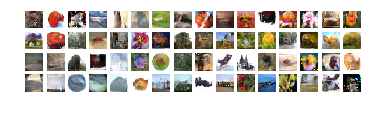

In [6]:
model.visualize_model()